In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
def relu(x):
    return np.maximum(0, x)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [2]:
class CPG:
    def __init__(self, num_neurons, coupling_strength):
        self.num_neurons = num_neurons
        self.coupling_strength = coupling_strength
        self.phase_offset = np.random.uniform(-np.pi, np.pi, size=num_neurons)
        self.frequency = np.random.uniform(0.5, 2.0, size=num_neurons)
        #self.amplitude = np.random.uniform(0.5, 2.0, size=num_neurons)
        self.bias = np.random.uniform(-1.0, 1.0, size=num_neurons)
        self.phase = np.zeros((num_neurons,))
        self.output = np.zeros((num_neurons,))
        self.weights = np.random.uniform(-1.0, 1.0, size=(num_neurons, num_neurons))
        self.num_genes = (self.weights.flatten().shape[0]+
                          self.bias.flatten().shape[0]+
                          self.frequency.flatten().shape[0])
    def step(self, inputs, dt):
        inputs=inputs.reshape(self.num_neurons,1)
        # Calculate the coupling between neurons using the evolved weights
        coupling = relu(self.coupling_strength * np.dot(self.output.T,self.weights))
        
        # Update the phase of each neuron
        self.phase += np.add((2 * np.pi * self.frequency * dt),
                                coupling)
        # Calculate the output of each neuron
        self.output = np.sin(self.phase ) + self.bias.reshape(self.num_neurons,1)
        
        # Add inputs from sensors to the output
        self.output = np.add(self.output ,inputs)
        self.output=np.sum(self.output,axis=1)
    def reset(self):
        self.phase = np.zeros((self.num_neurons,))
        self.output = np.zeros((self.num_neurons,))
    def set_genes(self,genotype):
        self.weights=genotype[0:self.weights.flatten().shape[0]].reshape(self.num_neurons,self.num_neurons)
        self.bias=genotype[self.weights.flatten().shape[0]:self.weights.flatten().shape[0]+self.bias.flatten().shape[0]]
        self.frequency=genotype[self.weights.flatten().shape[0]+self.bias.flatten().shape[0]:]
    def forward(self,inputs,dt):
        self.step(inputs,dt)
        instruct=np.tanh(self.output)
        instruct[instruct<0]=-1
        instruct[instruct>=0]=1
        return instruct

In [3]:
cpg=CPG(12,1)


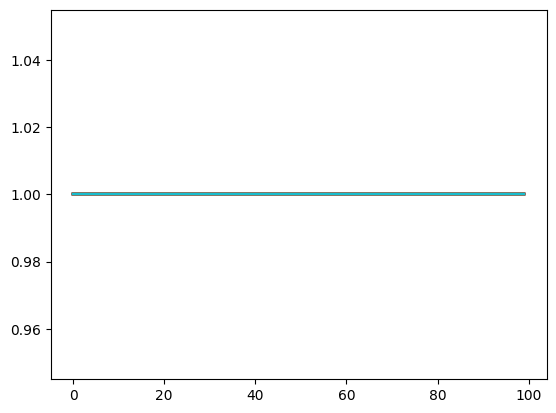

In [4]:
inputs=np.random.normal(0,2,(12,))
genotype=np.random.normal(0,1,(cpg.num_genes))
cpg.set_genes(genotype)
a=np.ones((100,12,))
for i in range(100):
    cpg.step(inputs,0.01)
    instruct=np.tanh(cpg.output)
    instruct[instruct<0]=-1
    instruct[instruct>=0]=1
    a[i]=instruct
    #plt.imshow(instruct.reshape(5,1))
    clear_output()
    plt.cla
    plt.plot(np.squeeze(a)[:,0])
    #plt.pause(0.05)

plt.show()

(12, 100)


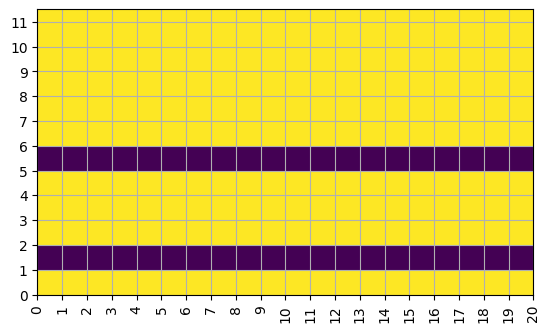

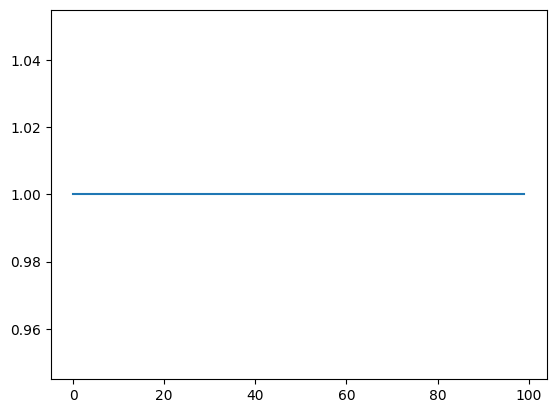

In [5]:
cpg=CPG(12,0.2)
inputs=np.random.normal(0,5,(12,))
#genotype=np.load("/its/home/drs25/Documents/RL_and_Evolve/Simwork/Krab/model_cpg_noRendA.npy")

cpg.set_genes(genotype)

genotype=np.random.normal(0,1,(cpg.num_genes))
SIZE=100
a=np.ones((SIZE,12))
image=np.zeros((SIZE,12))
#cpg.set_genes(genotype+np.random.normal(0,6,(cpg.num_genes)))
for i in range(SIZE):
    cpg.step(inputs,0.01)
    instruct=np.tanh(cpg.output)
    instruct[instruct<0]=-1
    instruct[instruct>=0]=1
    a[i]=instruct
    #plt.imshow(instruct.reshape(12,1))
    #plt.pause(0.05)
    clear_output()
    image[i]=instruct.reshape(12,)

CUT=40
buffer=20
fig = plt.figure()
ax = fig.add_subplot(111)
print(image.T.shape)
plt.imshow(image.T[:,CUT:CUT+buffer])
plt.yticks([i-0.5 for i in range(buffer)],[i for i in range(buffer)])
plt.xticks([i-0.5 for i in range(buffer*2)],[i for i in range(buffer*2)],rotation=90)
plt.ylim([-0.5,11])
plt.xlim([-0.5,19.5])
plt.grid()
plt.show()

plt.plot(np.squeeze(a.T[0]))

plt.show()

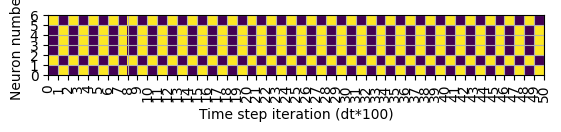

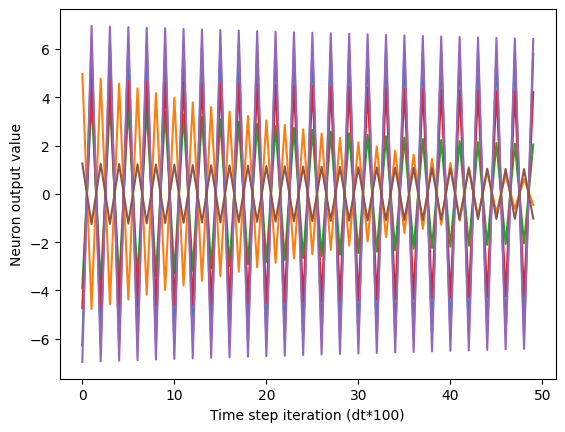

In [23]:
#inhibition net
Neurons=6
x=np.random.normal(0,3,(Neurons))
I=sigmoid(np.random.randint(2, size=Neurons)) #add some inputs onto it#np.random.normal(0,3,(Neurons,)) #inputs
w=np.random.normal(0,1,(Neurons,Neurons))#np.ones((Neurons,Neurons)) #replace with normal distribution for better behaviours, ones for inhibition
dt=0.01
NUM=50
grid=np.array([
    [0,1,1,1,0,0],
    [1,0,1,0,1,0],
    [1,1,0,0,0,1],
    [1,0,0,0,1,1],
    [0,1,0,1,0,1],
    [0,0,1,1,1,0]
])
a=np.zeros((NUM,Neurons))
for i in range(NUM):
    x=(-x + relu(x*I - np.dot(x,((w*grid)**2))) *dt)
    a[i]=x
image=np.copy(a)
image[image<0]=-1
image[image>=0]=1
plt.imshow(image.T)
plt.yticks([i-0.5 for i in range(NUM)],[i for i in range(NUM)])
plt.xticks([i-0.5 for i in range(NUM*2)],[i for i in range(NUM*2)],rotation=90)
plt.ylim([-0.5,Neurons-0.5])
plt.xlim([-0.5,NUM-0.5])
plt.grid()
plt.ylabel("Neuron number")
plt.xlabel("Time step iteration (dt*100)")
plt.show()
plt.plot(a)
plt.ylabel("Neuron output value")
plt.xlabel("Time step iteration (dt*100)")
plt.show()

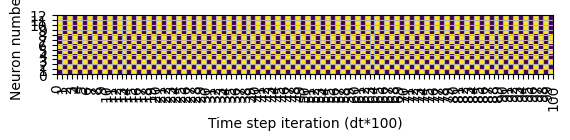

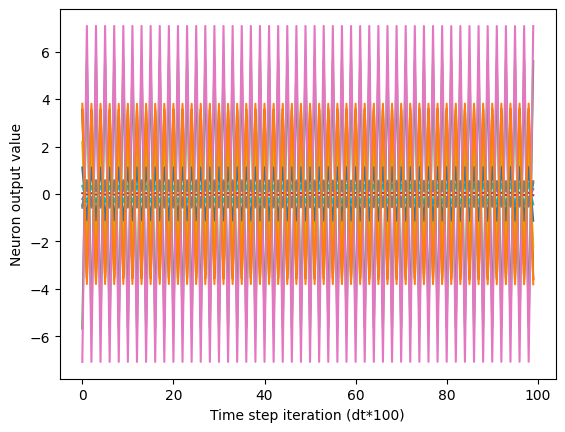

In [8]:
class CPG_hexapod:
    def __init__(self,Neurons=6):
        self.n=Neurons
        self.w=np.random.normal(0,1,(Neurons,Neurons)) #eights of neurons
        self.x=np.zeros((Neurons))
        self.grid=np.array([
            [0,1,1,1,0,0],
            [1,0,1,0,1,0],
            [1,1,0,0,0,1],
            [1,0,0,0,1,1],
            [0,1,0,1,0,1],
            [0,0,1,1,1,0]
        ]) #create a grid preventing any connections that should not be
        self.leg_=np.random.normal(0,1,(Neurons,self.n*2)) #eights of neurons
        self.y=np.random.normal(0,3,(Neurons,2))
    def step(self,I,dt=0.01):
        self.x=(-self.x + relu(I - np.dot(self.x,((self.w*self.grid)))) *dt)
        self.y=(-self.y + relu( np.dot(self.x,self.leg_**2).reshape(self.n,2) *dt))
        return self.y.flatten()
    def reset(self):
        self.x=np.zeros((Neurons))
        self.y=np.random.normal(0,3,(Neurons,2))


dt=0.01
NUM=100
Neurons=6
I=sigmoid(np.random.randint(2, size=Neurons)) #add some inputs onto it#np.random.normal(0,3,(Neurons,)) #inputs
net=CPG_hexapod()

a=np.ones((NUM,12))
for i in range(NUM):
    I=sigmoid(np.random.randint(2, size=Neurons)) #add some inputs onto it#np.random.normal(0,3,(Neurons,)) #inputs
    x=net.step(I)
    a[i]=x
image=np.copy(a)
image[image<0]=-1
image[image>=0]=1
plt.imshow(image.T)
plt.yticks([i-0.5 for i in range(NUM)],[i for i in range(NUM)])
plt.xticks([i-0.5 for i in range(NUM*2)],[i for i in range(NUM*2)],rotation=90)
plt.ylim([-0.5,(Neurons*2)-0.5])
plt.xlim([-0.5,NUM-0.5])
plt.grid()
plt.ylabel("Neuron number")
plt.xlabel("Time step iteration (dt*100)")
plt.show()
plt.plot(a)
plt.ylabel("Neuron output value")
plt.xlabel("Time step iteration (dt*100)")
plt.show()

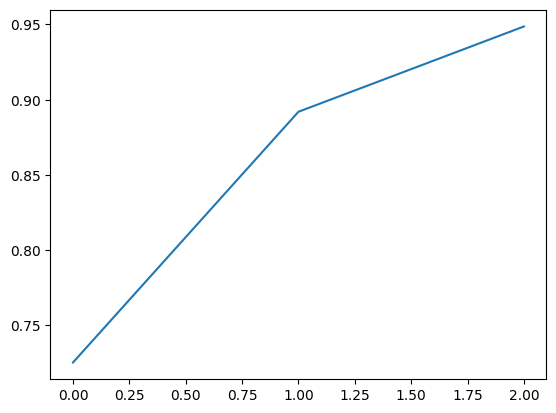

In [4]:
import numpy as np

# Define the number of neurons and their initial activities
N = 3
a = np.zeros(N)  # initialize activities to zero

# Define the inputs and connection weights between neurons
I = np.array([1.0, 2.0, 3.0])  # input to each neuron
W = np.array([[0.0, -0.5, 0.5], [0.5, 0.0, -0.5], [-0.5, 0.5, 0.0]])  # connection weights

# Define the activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the time step and duration of simulation
dt = 0.1
t_end = 10.0

# Initialize arrays to store the activities over time
t = np.arange(0, t_end, dt)
activities = np.zeros((len(t), N))

# Simulate the activities of the neurons over time
for i in range(len(t)):
    # Compute the net input to each neuron
    net_input = I - np.dot(W, a)
    # Update the activities of the neurons using the differential equation
    da_dt = -a + sigmoid(net_input)
    a = a + da_dt * dt
    # Store the activities for this time step
    activities[i,:] = a
plt.plot(a)
plt.show()